Let $f(x,y) = x^2 + y^2$ be a simple function we know how to calculate the gradient of 

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LightSource
from matplotlib import cm
from matplotlib import rcParams
rcParams['axes.labelpad'] = 0
import sys 

def f(x,y):
    return x**2 + y**2

In [39]:
def grad_f(theta):
    return np.array([2*theta[0], 2*theta[1]])

N_iter = 20
x = 5
y = 5
eps = 0.25


theta = np.array([x,y])

thetas = []

for i in range(N_iter):
    theta = theta - eps * grad_f(theta)
    
    thetas.append(theta)
    sys.stdout.write('Step {}/{} : theta = {}\n'.format(i+1, N_iter, theta)) 
    
    
    

Step 1/20 : theta = [2.5 2.5]
Step 2/20 : theta = [1.25 1.25]
Step 3/20 : theta = [0.625 0.625]
Step 4/20 : theta = [0.3125 0.3125]
Step 5/20 : theta = [0.15625 0.15625]
Step 6/20 : theta = [0.078125 0.078125]
Step 7/20 : theta = [0.0390625 0.0390625]
Step 8/20 : theta = [0.01953125 0.01953125]
Step 9/20 : theta = [0.00976562 0.00976562]
Step 10/20 : theta = [0.00488281 0.00488281]
Step 11/20 : theta = [0.00244141 0.00244141]
Step 12/20 : theta = [0.0012207 0.0012207]
Step 13/20 : theta = [0.00061035 0.00061035]
Step 14/20 : theta = [0.00030518 0.00030518]
Step 15/20 : theta = [0.00015259 0.00015259]
Step 16/20 : theta = [7.62939453e-05 7.62939453e-05]
Step 17/20 : theta = [3.81469727e-05 3.81469727e-05]
Step 18/20 : theta = [1.90734863e-05 1.90734863e-05]
Step 19/20 : theta = [9.53674316e-06 9.53674316e-06]
Step 20/20 : theta = [4.76837158e-06 4.76837158e-06]


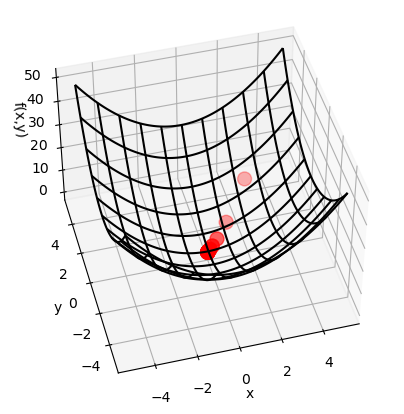

In [40]:

thetas = np.array(thetas)
xv, yv = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (5, 5))
surf = ax.plot_wireframe(xv, yv, f(xv, yv), rstride=10, cstride=10, color = 'black')
ax.scatter(thetas[:,0], thetas[:,1], f(thetas[:,0], thetas[:,1]), s = 100, c = 'red')
ax.view_init(elev=45, azim=-105, roll=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()



---
# Automatic Differnentiation


In this example, it was convient that we knew what the gradient was, but suppose, as is always the case in any ML example, that we didn't? Under these circumstances, we make use of __automatic differentiation__! 

To do so, we will use _PyTorch_'s autodiff library

In [41]:
import torch 
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm 

class func(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.theta = nn.Parameter(torch.FloatTensor(2).uniform_(-5,5))
        sys.stdout.write('initial guess is {}'.format(self.theta.detach().numpy()))
        
    def __call__(self, theta):
        return theta[0]**2 + theta[1]**2
        


g = func()

optimizer = optim.Adam(g.parameters(), lr = .5)

thetas = []

N_iter = 500
for i in tqdm(range(N_iter)):
    th = g.theta.detach().numpy().copy()
    thetas.append(th)
    optimizer.zero_grad()
    loss = g(g.theta)
    loss.backward()
    optimizer.step()    
  

sys.stdout.write('optimized solution is {}'.format(g.theta.detach().numpy()));





initial guess is [0.6471329  0.59010124]

  0%|          | 0/500 [00:00<?, ?it/s]

optimized solution is [2.7321448e-12 2.5417259e-12]

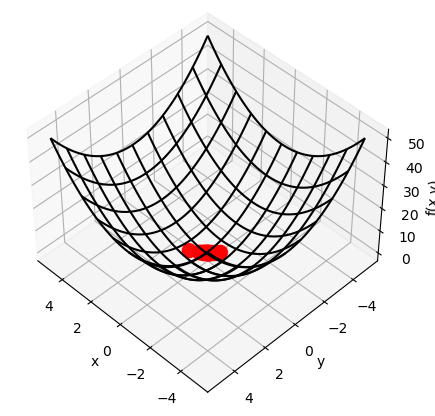

In [42]:
thetas = np.array(thetas)
xv, yv = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (5, 5))
surf = ax.plot_wireframe(xv, yv, f(xv, yv), rstride=10, cstride=10, color = 'black')
ax.scatter(thetas[:,0], thetas[:,1], f(thetas[:,0], thetas[:,1]), s = 100, c = 'red')
ax.view_init(elev=45, azim=135, roll=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()





---
Now, we have something more complicated: $f(x,y) = \sin(x)^{2}cos(y)^{2} + cos(x)^{2}sin(y)^{2}$.
Strictly speaking, we could calculate a gradient by hand here, but that's a lot of work, so let's just get the computer to do it for us
---

In [47]:
import torch 
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm 

class func(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.theta = nn.Parameter(torch.FloatTensor(2).uniform_(-0,2*torch.pi))
        sys.stdout.write('initial guess is {}'.format(self.theta.detach().numpy()))
        
    def __call__(self, theta):
        return torch.sin(theta[0])**2 + torch.cos(theta[1])**2 


g = func()

optimizer = optim.Adam(g.parameters(), lr = 1e-3)

thetas = []

N_iter = 10000
for i in tqdm(range(N_iter)):
    th = g.theta.detach().numpy().copy()
    thetas.append(th)
    optimizer.zero_grad()
    loss = g(g.theta)
    loss.backward()
    optimizer.step()    

sys.stdout.write('optimized solution is {}'.format(g.theta.detach().numpy()));




initial guess is [3.9627662 3.248923 ]

  0%|          | 0/10000 [00:00<?, ?it/s]

optimized solution is [3.141593  4.7123885]

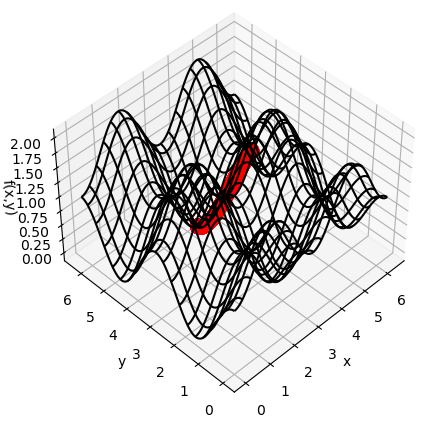

In [48]:

def f(x,y):
    return np.sin(x)**2+np.cos(y)**2

thetas = np.array(thetas)
xv, yv = np.meshgrid(np.linspace(-0*np.pi, 2*np.pi, 100), np.linspace(-0*np.pi, 2*np.pi, 100))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (5, 5))
surf = ax.plot_wireframe(xv, yv, f(xv, yv), rstride=5, cstride=5, color = 'black')
ax.scatter(thetas[:,0], thetas[:,1], f(thetas[:,0], thetas[:,1]), s = 100, c = 'red')
ax.view_init(elev=45, azim=-135, roll=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

